# Types of Data used for I/O:
   - Text : '12345' a sequence of unicode Characters
   - Binary : 12345 as a sequence of bytes of its binary equivalent.
    
* Hence there are 2 file types to deal with :
   - Text Files : All program files are text files.
   - Binary Files : Images,music,video,exe files.

## How File I/O is done in most Programming Languages :
   - Open a File
   - Read/Write Data
   - Close the File

### Writing to a File :

#### Case 1 - If the File is not present

In [4]:
f = open('sample.txt','w')
f.write('HELLO World')
f.close() ## Once the file is closed, write operation will not work. We'd have to open the file again in Write mode.

##### Writing Multiple Strings :

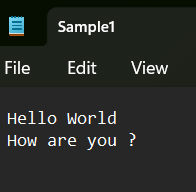

In [5]:
f = open('Sample1.txt','w')
f.write('Hello World')
f.write('\nHow are you ?')
f.close()

#### Case 2 : If the File already Exists
If we are opening an Existing file and performing a write operation on it, the old content is erased and the new content is added to the file.

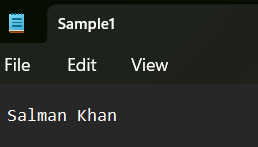

In [6]:
f = open('Sample1.txt','w')
f.write('Salman Khan')
f.close()

#### Case 3:  Write multiple lines in 1 go :

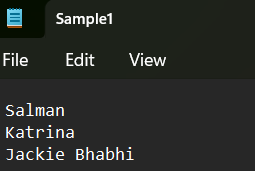

In [9]:
L = ['Salman\n','Katrina\n','Jackie Bhabhi']

f = open('Sample1.txt','w')
f.writelines(L)
f.close()

#### Problem with w Mode:
* Replaces the entire content of a file to the new content.

#### Append 'A' :
Used where, we do not want to replace the entire content of a document but we want to append/add new content.

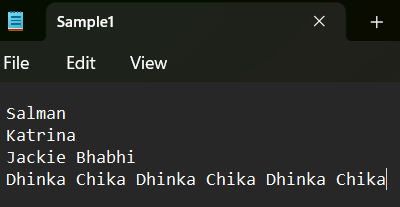

In [10]:
f = open('Sample1.txt','a')
f.write('\nDhinka Chika Dhinka Chika Dhinka Chika')
f.close()

### Reading from Files 

#### read() :
Reads the entire document at once.

In [2]:
f = open('Sample1.txt','r')
s = f.read()
print(s)
f.close()

Salman
Katrina
Jackie Bhabhi
Dhinka Chika Dhinka Chika Dhinka Chika


#### Reading upto n characters :

In [4]:
f = open('Sample1.txt','r')
s = f.read(10) ## Reads 10 characters
print(s)
f.close()

Salman
Kat


#### readline():
Reads document line by line.

In [5]:
f = open('Sample1.txt','r')
print(f.readline())
print(f.readline())
f.close()

Salman

Katrina



We see 2 lines gap in the text printed, that is because readlines also goes to the next line and so does \n in the document.

In [6]:
f = open('Sample1.txt','r')
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

Salman
Katrina


#### Reading the entire document using readline

In [7]:
f = open('Sample1.txt', 'r')

while True:

    data = f.readline()

    if data == '':
        break

    else:
        print(data, end='')

f.close()

Salman
Katrina
Jackie Bhabhi
Dhinka Chika Dhinka Chika Dhinka Chika

#### With using Context Manager :
* It's a good idea to close a file after usage as it will free up the resources.
* If we don't close it, garbage collector would eventually close it.
* with keyword closes the file as soon as the usage is over.

In [10]:
with open ('Sample.txt', 'w') as f:
    f.write('John Abraham')

In [11]:
f.write('Bips') ## Shows the file is closed.

ValueError: I/O operation on closed file.

In [13]:
with open('Sample1.txt', 'r') as f:
    print(f.read())

Salman
Katrina
Jackie Bhabhi
Dhinka Chika Dhinka Chika Dhinka Chika


#### Moving with in a File :
printing 10 characters then next 10 so that then ram is not too loaded incase of a very big file.

In [14]:
with open('Sample1.txt', 'r') as f:
    print(f.read(10))

Salman
Kat


In [15]:
with open('Sample1.txt', 'r') as f:
    print(f.read(10))
    print(f.read(10))

Salman
Kat
rina
Jacki


#### Loading a big file in chunks :

In [3]:
with open('Sample1.txt','r') as f:
    
    chunk_size = 10

    while True:

        data = f.readline(chunk_size)

        if data == '':
            break

        else:
            print(data, end='**')


Salman
**Katrina
**Jackie Bha**bhi
**Dhinka Chi**ka Dhinka **Chika Dhin**ka Chika**

#### Seek & Tell :

- Tell : Lets us know what position is the cursor is currently at.
- Seek : Let's us take the cursor to the index position where we want.

In [9]:
with open('Sample1.txt','r') as f:
    print(f.read(10))
    print(f.tell())
    print()
    
    f.seek(20)
    print(f.read(15),end='')
    print(f.tell())

Salman
Kat
11

kie Bhabhi
Dhin36


#### Seek during write :

In [10]:
with open('Sample.txt','w') as f:
    f.write('Hello')
    f.seek(0)
    f.write('X')   

In [12]:
with open('Sample.txt','r') as f:
    print(f.read())

Xello


Here, we wee the entire text is not replaced with X but just the index position with number of characters to be written.

In [14]:
with open('Sample.txt','w') as f:
    f.write('Hello')
    f.seek(0)
    f.write('Ja')   
    
with open('Sample.txt','r') as f:
    print(f.read())

Jallo


### Problem with working in Text Mode :
- Can not work with Binary Files like Images.
- Not good for other Data types like int/float/list/tuples

## Working With Binary Files :

In [18]:
with open (r"C:\Users\prate\OneDrive\Pictures\Screenshots\Screenshot_20221029_110530.png","rb") as f:  ## Open the file in rb - read Binary
    with open('Screenshoot_copy.png','wb') as wf: ## Open a new file to make a copy of original file
        wf.write(f.read())  ## Write the file to make a copy

## Working on other Data types :
We see we below that we cannot add any other data type we have to convert it to string Data Type only.

In [20]:
with open('sample.txt','w') as f:
    f.write(5) ## Int data type not allowed

TypeError: write() argument must be str, not int

In [21]:
with open('sample.txt','w') as f:
    f.write('5')  ## Pass the data in string format.

In [22]:
with open('sample.txt','r') as f:
    print('Data Type ==> ',type(f.read()),f.read())

Data Type ==>  <class 'str'> 


In [23]:
## Operations as below would not work :

with open('sample.txt','r') as f:
    print('Data Type ==> ',type(f.read()),f.read())
    print(f.read()+5)

Data Type ==>  <class 'str'> 


TypeError: can only concatenate str (not "int") to str

In [25]:
## We'd have to explicitly convert the data type for the code to work :

with open('sample.txt','r') as f:
    print(int(f.read())+5)    ## Data Type Conversion

10


In [26]:
##### Example with Dict.

d = {
    'name':'Prateek',
    'age':33,
    'Gender' : 'Male'
}

with open('sample.txt','w') as f:
    f.write(d)

TypeError: write() argument must be str, not dict

In [27]:
d = {
    'name':'Prateek',
    'age':33,
    'Gender' : 'Male'
}

with open('sample.txt','w') as f:
    f.write(str(d))

In [29]:
with open('sample.txt','r') as f:
    print(f.read())
    print(type(f.read()))

{'name': 'Prateek', 'age': 33, 'Gender': 'Male'}
<class 'str'>


In [30]:
## But to work on Dictionary, we try to convert it dict type but it'd throw an error 
## because we cannot convert a str to Dict as the info about the key and value is lost.

with open('sample.txt','r') as f:
    print(dict(f.read()))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

# Serialization and Deserialization :

- Serialization : Process of converting Python Data types to JSON format.
- Deserialization : Process of converting JSON data types to Python Format.

## What is JSON?

Java Script on Notation. Universal Data type that is understood by all the languages. Looks like key value pairs in Pyton.

### Serialization using JSON module :

#### Example List :

In [31]:
import json

In [39]:
L = [1,2,3,4,'fat',['Salman','Khan']]

with open ('demo.json','w') as f:
    json.dump(L,f)

### Deserialization :

In [40]:
with open ('demo.json','r') as f:
    d= json.load(f)
    print(d)
    print(type(d))

[1, 2, 3, 4, 'fat', ['Salman', 'Khan']]
<class 'list'>


#### Example with Dictionary :

In [47]:
d = {
    'name':'Prateek',
    'age':33,
    'Gender' : 'Male'
}

with open('demo.json','w') as f:
    json.dump(d,f,indent=4) ## Indent 4 is used to view the code in a multiple lines instead of 1.

In [49]:
with open ('demo.json','r') as f:
    d= json.load(f)
    print(d)
    print(type(d))

{'name': 'Prateek', 'age': 33, 'Gender': 'Male'}
<class 'dict'>


#### Example with Tuple :

A Tuple is converted to list while saving it as json file.

In [50]:
t = (1,2,3,4,5)

with open('demo.json','w') as f:
    json.dump(t,f,indent=4)

In [51]:
with open ('demo.json','r') as f:
    d= json.load(f)
    print(d)
    print(type(d))

[1, 2, 3, 4, 5]
<class 'list'>


#### Example with nested dict :

In [52]:
d = {
    'name':'Prateek',
    'Marks': [43,57,89,65]
}

with open ('demo.json','w') as f:
    json.dump(d,f)

In [53]:
with open ('demo.json','r') as f:
    df = json.load(f)
    print(df)
    print(type(df))

{'name': 'Prateek', 'Marks': [43, 57, 89, 65]}
<class 'dict'>


#### Serialization and Deserialization Custom Objects :

In [54]:
class Person:
    
    def __init__(self,fname,lname,age,gender):
        self.fname = fname
        self.lname = lname
        self.age = age
        self.gender = gender

Format to print in :
Prateek---AP-Age -->33, gender--->male

In [55]:
person = Person('Prateek','AP',33,'Male')

In [56]:
## As a string 

import json
    
with open ('demo.json','w') as f:
    json.dump(person,f)

TypeError: Object of type Person is not JSON serializable

**We will not be able to serialize a custom object like json.dump(person,f) this only works with Python predefined data types.**

**To Serialize a custom object, we'd have to specify the format(show_object class we created below) which it needs to be saved in as belows:**

In [58]:
class Person:
    
    def __init__(self,fname,lname,age,gender):
        self.fname = fname
        self.lname = lname
        self.age = age
        self.gender = gender

In [59]:
person = Person('Prateek','AP',33,'Male')

In [62]:
## As a string 

import json

def show_object(person):
    if isinstance(person,Person):
        return "{}{} age -->{} gender -->{}".format(person.fname,person.lname,person.age,person.gender)
    
with open ('demo.json','w') as f:
    json.dump(person,f,default=show_object)

In [63]:
with open ('demo.json','r') as f:
    df = json.load(f)
    print(df)
    print(type(df))

PrateekAP age -->33 gender -->Male
<class 'str'>


# Pickling

Pickling is the process whereby a Python object Hierarchy is converted into a byte stream, and unpickling is the inverse operation, where by a byte stream (from a binary file or bytes-like object) is converted into an object Hierarchy.

In [64]:
class Person:
    
    def __init__(self,name,age):
        self.name = name
        self.age = age
    
    def display_info(self):
        print('Hi my name is ',self.name,'and I am ',self.age,'Years old')

In [65]:
p = Person('Prateek',33)

In [67]:
import pickle

with open('person.pkl','wb') as f:
    pickle.dump(p,f)    ## This pickle file containg the object Person and can access any method in it.
                        ## hence we dump ml models in Pickle format.We can download the pickle file and use it to execute the ml model in other system later.

In [71]:
with open('person.pkl','rb') as f:
    p = pickle.load(f)
    print(p.display_info())

Hi my name is  Prateek and I am  33 Years old
None


## Pickle vs JSON

Pickle lets the user store data in Binary format. Json lets the user store the data in human readable format.

# Exception Handling 

There are 2 stages where error may happen in a Program :
- During Compilation --> Syntax Error
- During Execution --> Exceptions

## Syntax Error :

- Something in the program is not written according to the program grammar.
- Error is raised by the interpreter/compiler.
- You can solve it by rectifying the program.

In [72]:
## Examples of Syntax Error :

print 'Hello'

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Hello')? (1498706736.py, line 3)

### Other Examples of Syntax Error:

- Leaving symbols like colon, brackets.
- Miss-spelling a keyword.
- Incorrect Indentation.
- empty if/else/loops/class/functions

#### Index Error :
Index error is thrown, when trying to access an item at an Invalid Index.

In [76]:
L = [1,2,3,4]
L[10]

IndexError: list index out of range

#### ModuleNotFoundError :
ModuleNotFoundError is thrown when a Module could not be found.

In [78]:
import bumpy

ModuleNotFoundError: No module named 'bumpy'

#### KeyError :
KeyError is usually thrown, when a key is not found in a dictionary.

In [81]:
d = {'Name':'Prateek'}
d['age']

KeyError: 'age'

#### TypeError : 
The type error is thrown when an operation or functio is applied to an object of Inappropriate Type

In [83]:
'a' + 2.4

TypeError: can only concatenate str (not "float") to str

#### ValueError :
ValueError is thrown when a functions argument is of an inappropriate type.

In [84]:
int('a')

ValueError: invalid literal for int() with base 10: 'a'

#### NameError :
NameError is thrown when an object could not be found.

In [85]:
axzt

NameError: name 'axzt' is not defined

####  AttributeError:
AttributeError is thrown when we are trying to access a method that doesnot exit in a class.

In [87]:
L = [1,2,3]
L.upper()

AttributeError: 'list' object has no attribute 'upper'

## Exceptions :

If things go wrong during the execution of the program(runtime). It generally happens when something unforeseen has happened.
* Exceptions are raised by python runtime.
* You have to tackle it on the fly.

**Examples :**

- Memory overflow
- Divide by 0 --> LogicalError
- Database Error.

Why is it Important to handle Exceptions :

- User Experience 
- Security 

an error is thrown as below, which is scary for an app user and stacktrace shows us the file location, code and other details anyone could copy your code. Hence security is another concern

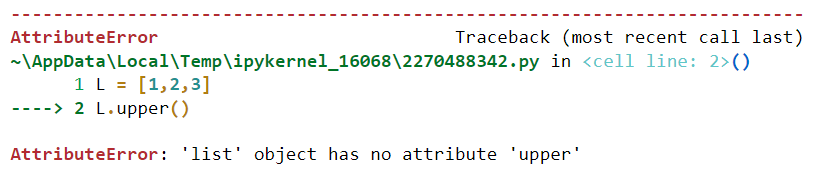

### Handling Exceptions : Try -- Except

In [89]:
with open ('sample.txt','w') as f:
    f.write('Hello World')

In [90]:
try:
    with open ('sample.txt','r') as f:
        print(f.read())
except:
    print('File not found')

Hello World


In [91]:
try:
    with open ('sample23.txt','r') as f:
        print(f.read())
except:
    print('File not found')

File not found


#### Excepting specific Exceptions :

In [102]:
try :
    with open('sample.txt123','r') as f:
        print(f.read())
        
    
except Exception as e:
    print(e.with_traceback)

<built-in method with_traceback of FileNotFoundError object at 0x0000021B0EF545C0>


In [107]:
try :
    with open('sample.txt123','r') as f:
        print(f.read())
        
except FileNotFoundError:
    print('File Not Found')
    
    
except Exception as e:
    print(e.with_traceback)

File Not Found


In [108]:
try :
    with open('sample.txt','r') as f:
        print(f.read())
        print(m)
        
except FileNotFoundError:
    print('File Not Found')
    
    
except Exception as e:
    print(e.with_traceback)

Hello World
<built-in method with_traceback of NameError object at 0x0000021B0FF12A40>


In [109]:
try :
    with open('sample.txt','r') as f:
        print(f.read())
        print(m)
        
except FileNotFoundError:
    print('File Not Found')
    
except NameError:
    print('Variable not defined')
    
    
except Exception as e:
    print(e.with_traceback)

Hello World
Variable not defined


In [110]:
try :
    m = 5
    with open('sample.txt','r') as f:
        print(f.read())
        print(m)
        print(5/0)
        
except FileNotFoundError:
    print('File Not Found')
    
except NameError:
    print('Variable not defined')
    
    
except Exception as e:
    print(e.with_traceback)   ## Will give us the Error

Hello World
5
<built-in method with_traceback of ZeroDivisionError object at 0x0000021B0C0DCEF0>


In [111]:
try :
    m = 5
    with open('sample.txt','r') as f:
        print(f.read())
        print(m)
        print(5/2)
        l = [1,2,3]
        l[100]
        
except FileNotFoundError:
    print('File Not Found')
    
except NameError:
    print('Variable not defined')
    
except ZeroDivisionError:
    print('Cannot divide by Zero')
    
    
except Exception as e:  ## This would tell the user the error
    print(e)

Hello World
5
2.5
list index out of range


### Else : 
Else would contain the code(The code we are sure of that will not throw any error) that we want to execute after the code in Try block(The code we are not sure of) has successfully executed. Eg:

In [112]:
try :
    f = open('sample.txt','r')   ## First the Control is at try. If the code fails one of the 2 exceptions would be triggered.
                                 ## Else the control would go to else :
    
except FileNotFoundError:
    print('File Nahi Mili')
except Exception:
    print(e)

else:
    print(f.read())

Hello World


### Finally :

Finally is the block, where in we put the code that has to be executed irrespective if the code throws exception or executes.

In [113]:
try :
    f = open('sample123.txt','r')
    
except FileNotFoundError:
    print('File Nahi Mili')
except Exception:
    print(e)

else:
    print(f.read())
    
finally:
    print('Ye to print hoga hi')

File Nahi Mili
Ye to print hoga hi


### Raise Exception :

* In python, exceptions are raised when error occurs at runtime.
* We can manually raise exceptions using the raise keyword.
* We can optionally pass value to the exception to clarify why that exception was raised.

In [1]:
class Bank:
    
    def __init__(self,balance):
        self.balance = balance
        
    def withdraw(self,amount):
        
        if amount < 0 :
            raise Exception('Amount Cannot be Negitive')
        if self.balance < amount:
            raise Exception('Paise nahi hai itte tere paas')
            
        self.balance = self.balance-amount

In [8]:
obj = Bank(10000)
try:
    obj.withdraw(155555)
except Exception as e:
    print(e)
else:
    print(obj.balance)    

Paise nahi hai itte tere paas


#### Raise Custom Exceptions :

In [11]:
class MyException(Exception):

    def __init__(self, message):
        print(message)


class Bank:

    def __init__(self, balance):
        self.balance = balance

    def withdraw(self, amount):

        if amount < 0:
            raise MyException('Amount Cannot be Negitive')
        if self.balance < amount:
            raise MyException('Paise nahi hai itte tere paas')

        self.balance = self.balance - amount

In [13]:
obj = Bank(10000)
try:
    obj.withdraw(155555)
except MyException as e:
    pass
else:
    print(obj.balance)    

Paise nahi hai itte tere paas


**In the above code, there is no need of creating a custom MyException class because we are not doing anything new from the code where we raise there error from Exception class.**

**The true power of creating a custom class is when we want to do something, when the exception occurs.**

Eg We are creating a gmail application as below, where if the login details including there device match then, the application allows us to login else it terminates the connection.

In [17]:
class SecurityError(Exception):
    def __init__(self,message):
        print('Message')
        
    def logout(self):
        print('Logged out')
        
        
class Google:
    def __init__(self,name,email,password,device):
        self.name = name
        self.email = email
        self.password = password
        self.device = device


    def login(self,email,password,device):
        if device != self.device:
            raise SecurityError('Bhai tu to gaya!!!!')
        if email == self.email and password == self.password:
            print('Welcome')
        else:
            print('login error')
        
obj = Google('Prateek','prateek@gmail.com','1234','android')

try:
    obj.login('prateek@gmail.com','1234','ios')
    
except SecurityError as e:
    e.logout()
else:
    print(obj.name)
finally:
    print('Database connection closed')

Message
Logged out
Database connection closed
